In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [3]:
import librosa
import wave
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import rmsprop

Using TensorFlow backend.


In [4]:
def extract_mfcc(wav_file_name):
    '''This function extracts mfcc features and obtain the mean of each dimension
    Input : path_to_wav_file
    Output: mfcc_features'''
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfccs

In [5]:
##### load radvess speech data #####
root_dir = "../Dataset/Audio_Speech_Actors_01-24"
radvess_speech_labels = []
ravdess_speech_data = []
for actor_dir in sorted(os.listdir(root_dir)):
    actor_name = os.path.join(root_dir, actor_dir)
    for file in os.listdir(actor_name):
        radvess_speech_labels.append(int(file[7:8]) - 1)
        wav_file_name = os.path.join(root_dir, actor_dir, file)
        ravdess_speech_data.append(extract_mfcc(wav_file_name))

In [6]:
ravdess_speech_data_array = np.asarray(ravdess_speech_data)
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape

(1440,)

In [7]:
### load RAVDESS song data
root_dir = "../Dataset/Audio_Song_Actors_01-24"
radvess_song_labels = []
ravdess_song_data = []
for actor_dir in sorted(os.listdir(root_dir)):
    actor_name = os.path.join(root_dir, actor_dir)
    for file in os.listdir(actor_name):
        radvess_song_labels.append(int(file[7:8]) - 1)
        wav_file_name = os.path.join(root_dir, actor_dir, file)
        ravdess_song_data.append(extract_mfcc(wav_file_name))

In [8]:
ravdess_song_data_array = np.asarray(ravdess_song_data)
ravdess_song_label_array = np.array(radvess_song_labels)
ravdess_song_label_array.shape

(1012,)

In [12]:
data = np.r_[ravdess_speech_data_array, ravdess_song_data_array]
labels = np.r_[ravdess_speech_label_array, ravdess_song_label_array]
# data = ravdess_speech_data_array
# labels = ravdess_speech_label_array
labels.shape

(2452,)

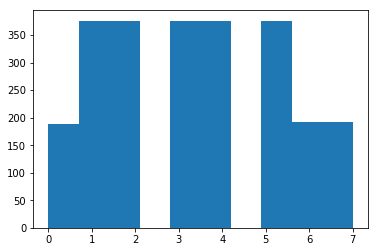

In [13]:
import matplotlib.pyplot as plt
plt.hist(labels)
plt.show()

In [14]:
labels_categorical = to_categorical(labels)
data.shape
labels_categorical.shape

(2452, 8)

In [15]:
def create_model_LSTM():
    ### LSTM model, referred to the model A in the report
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [16]:
number_of_samples = data.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [17]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(data[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(data[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=100, shuffle=True)

Train on 1961 samples, validate on 245 samples
Epoch 1/100
1961/1961 [==============================] - 3s 1ms/step - loss: 2.0598 - acc: 0.1520 - val_loss: 1.9024 - val_acc: 0.2776
Epoch 2/100
1961/1961 [==============================] - 2s 1ms/step - loss: 2.0254 - acc: 0.1662 - val_loss: 1.8545 - val_acc: 0.2980
Epoch 3/100
1961/1961 [==============================] - 2s 1ms/step - loss: 1.9867 - acc: 0.1999 - val_loss: 1.7809 - val_acc: 0.2735
Epoch 4/100
1961/1961 [==============================] - 2s 1ms/step - loss: 1.9331 - acc: 0.2315 - val_loss: 1.7442 - val_acc: 0.2122
Epoch 5/100
1961/1961 [==============================] - 3s 1ms/step - loss: 1.9011 - acc: 0.2438 - val_loss: 1.6849 - val_acc: 0.2612
Epoch 6/100
1961/1961 [==============================] - 2s 1ms/step - loss: 1.8564 - acc: 0.2733 - val_loss: 1.6525 - val_acc: 0.2367
Epoch 7/100
1961/1961 [==============================] - 2s 1ms/step - loss: 1.8135 - acc: 0.2845 - val_loss: 1.6332 - val_acc: 0.3224
Epoch 8/

Epoch 61/100
1961/1961 [==============================] - 2s 1ms/step - loss: 0.7606 - acc: 0.7104 - val_loss: 2.7909 - val_acc: 0.4490
Epoch 62/100
1961/1961 [==============================] - 2s 1ms/step - loss: 0.8083 - acc: 0.7134 - val_loss: 3.0370 - val_acc: 0.4735
Epoch 63/100
1961/1961 [==============================] - 2s 1ms/step - loss: 0.7738 - acc: 0.7093 - val_loss: 3.2742 - val_acc: 0.4571
Epoch 64/100
1961/1961 [==============================] - 2s 1ms/step - loss: 0.7299 - acc: 0.7226 - val_loss: 3.2921 - val_acc: 0.4367
Epoch 65/100
1961/1961 [==============================] - 2s 1ms/step - loss: 0.8038 - acc: 0.7119 - val_loss: 3.2197 - val_acc: 0.4612
Epoch 66/100
1961/1961 [==============================] - 2s 1ms/step - loss: 0.7875 - acc: 0.7114 - val_loss: 3.4299 - val_acc: 0.4245
Epoch 67/100
1961/1961 [==============================] - 2s 1ms/step - loss: 0.7454 - acc: 0.7374 - val_loss: 2.9266 - val_acc: 0.4531
Epoch 68/100
1961/1961 [========================

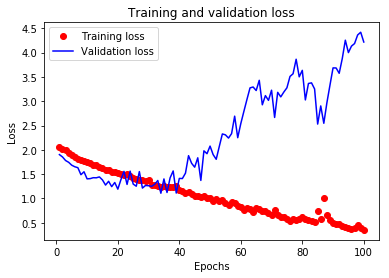

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plt.show()

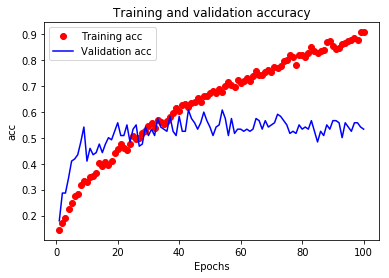

In [29]:
plt.clf()                                                

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [30]:
### evaluate using model A
model_A.evaluate(np.expand_dims(data[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

124/124 [==============================] - 0s 601us/step


[1.9765283907613447, 0.701612901303076]

In [20]:
def new_CNN():
    ### CNN model, referred to the model C in the report
    model = Sequential()
    model.add(Conv1D(8, 5,padding='same', input_shape=(40, 1)))
    model.add(Activation('relu'))
    model.add(Conv1D(16, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(32, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(16, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(8))
    model.add(Activation('softmax'))
    opt = rmsprop(lr=0.00001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
    return model


In [21]:
model_C = new_CNN()
history = model_C.fit(np.expand_dims(data[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(data[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=100, shuffle=True)

Train on 1961 samples, validate on 245 samples
Epoch 1/100
1961/1961 [==============================] - 0s 247us/step - loss: 3.2733 - acc: 0.1346 - val_loss: 2.0113 - val_acc: 0.1673
Epoch 2/100
1961/1961 [==============================] - 0s 159us/step - loss: 2.1102 - acc: 0.1591 - val_loss: 1.9494 - val_acc: 0.1796
Epoch 3/100
1961/1961 [==============================] - 0s 163us/step - loss: 2.0322 - acc: 0.1790 - val_loss: 1.8966 - val_acc: 0.2980
Epoch 4/100
1961/1961 [==============================] - 0s 147us/step - loss: 1.9989 - acc: 0.2121 - val_loss: 1.8272 - val_acc: 0.2735
Epoch 5/100
1961/1961 [==============================] - 0s 137us/step - loss: 1.9548 - acc: 0.2305 - val_loss: 1.8251 - val_acc: 0.2408
Epoch 6/100
1961/1961 [==============================] - 0s 149us/step - loss: 1.9125 - acc: 0.2376 - val_loss: 1.7206 - val_acc: 0.2735
Epoch 7/100
1961/1961 [==============================] - 0s 139us/step - loss: 1.8659 - acc: 0.2642 - val_loss: 1.6608 - val_acc: 0

1961/1961 [==============================] - 0s 147us/step - loss: 1.0935 - acc: 0.5905 - val_loss: 1.1526 - val_acc: 0.5469
Epoch 61/100
1961/1961 [==============================] - 0s 143us/step - loss: 1.0832 - acc: 0.5859 - val_loss: 1.2618 - val_acc: 0.5429
Epoch 62/100
1961/1961 [==============================] - 0s 141us/step - loss: 1.0705 - acc: 0.6063 - val_loss: 1.2010 - val_acc: 0.5224
Epoch 63/100
1961/1961 [==============================] - 0s 144us/step - loss: 1.0508 - acc: 0.6114 - val_loss: 1.2545 - val_acc: 0.5388
Epoch 64/100
1961/1961 [==============================] - 0s 139us/step - loss: 1.0606 - acc: 0.6002 - val_loss: 1.1455 - val_acc: 0.5388
Epoch 65/100
1961/1961 [==============================] - 0s 141us/step - loss: 1.0383 - acc: 0.6130 - val_loss: 1.1293 - val_acc: 0.5469
Epoch 66/100
1961/1961 [==============================] - 0s 146us/step - loss: 1.0234 - acc: 0.6099 - val_loss: 1.1312 - val_acc: 0.5224
Epoch 67/100
1961/1961 [=======================

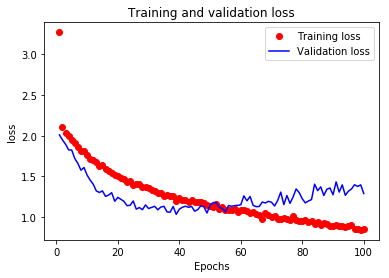

In [24]:
### loss plots using model C
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

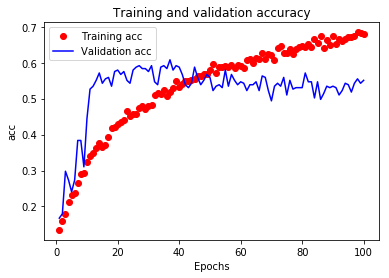

In [23]:
plt.clf()                                                

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()